# Deliverable 2: Scrape and Analyze Mars Weather Data

### Setup

In [64]:
# import modules
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
# launch browser
browser = Browser('chrome')

### Visit Website

In [66]:
# visit Mars temperature data site
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Scrape Website Table

In [67]:
# save html from browser
html = browser.html

# create beautiful soup object
soup = BeautifulSoup(html, 'html.parser')

In [68]:
# extract table
temp_table = soup.find('table', class_='table')

# display table
temp_table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Store Data into DataFrame

In [69]:
# extract headers
headers = temp_table.find_all('th')
header_names = [header.text for header in headers]

# show headers
header_names

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [70]:
# extract all rows of data (tr class='data-row')
rows = temp_table.find_all('tr', class_='data-row')

# extract each rows' data
row_data = [
    [td.text for td in row.find_all('td')]
    for row in rows
]

# display row data
row_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [71]:
# create dataframe
df = pd.DataFrame(row_data, columns=header_names)

# display df
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [79]:
# quit browser
browser.quit()

### Prepare Data for Analysis

In [72]:
# examine datatypes
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [77]:
# update date column dtype
df.terrestrial_date = pd.to_datetime(df.terrestrial_date)

# define int and float columns
int_cols = ['sol', 'ls', 'month']
float_cols = ['min_temp', 'pressure']

# update numeric columns dtypes
df[int_cols] = df[int_cols].astype(int)
df[float_cols] = df[float_cols].astype(float)

In [ ]:
# check updated datatypes
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Analyze Data

Column meanings in the dataframe:
* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

#### 1. How many months exist on Mars?
- 12 months

In [ ]:
# find number of unique months
df['month'].nunique()

12

#### 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
- 1867 Martian days

In [107]:
df['sol'].nunique()

1867

#### 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
- Coldest: Month 3 with an average minimum temperature of -83.31
- Warmest: Month 8 with an average minimum temperature of -68.38

In [84]:
# groupby month
month_grp = df.groupby('month')

# find the average minimum daily temperature for each month
avg_min_temps = month_grp['min_temp'].mean()

# display
avg_min_temps

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

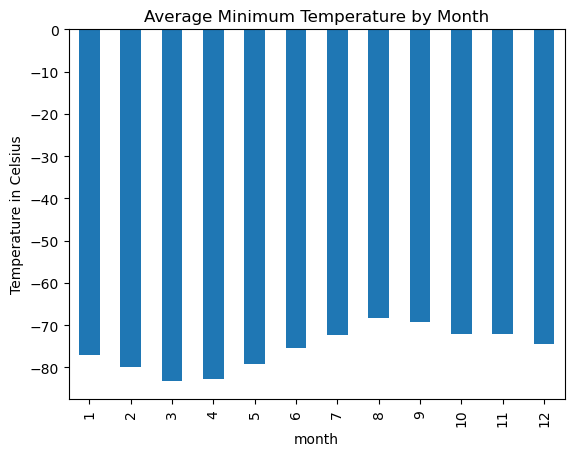

In [88]:
# plot results as a bar chart
avg_min_temps.plot(kind='bar', title='Average Minimum Temperature by Month',
                   ylabel= 'Temperature in Celsius')

plt.show()

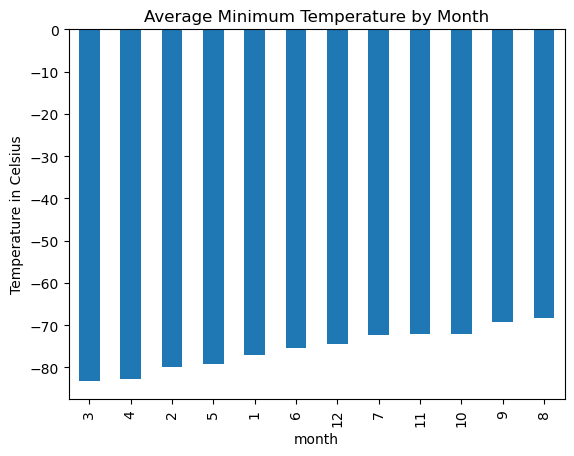

In [109]:
# sort the previous graph
avg_min_temps_sorted = avg_min_temps.sort_values()

# display plot
avg_min_temps_sorted.plot(kind='bar', title='Average Minimum Temperature by Month',
                          ylabel= 'Temperature in Celsius')

plt.show()

#### 4. Which months have the lowest and the highest atmospheric pressure on Mars?
- Lowest: Month 6 with an average of 745.05 atmospheric pressure
- Highest: Month 9 with an average of 913.31 atmospheric pressure

In [90]:
# find the average daily atmospheric pressure of all the months
avg_pressures = month_grp['pressure'].mean()

# display
avg_pressures

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

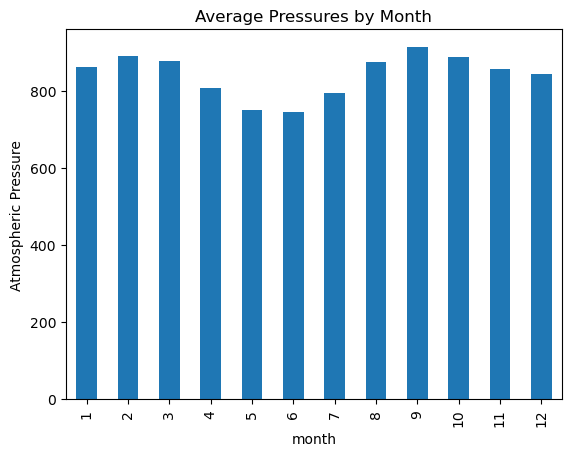

In [92]:
# plot results as a bar chart
avg_pressures.plot(kind='bar', title='Average Pressures by Month', 
                   ylabel='Atmospheric Pressure')

plt.show()

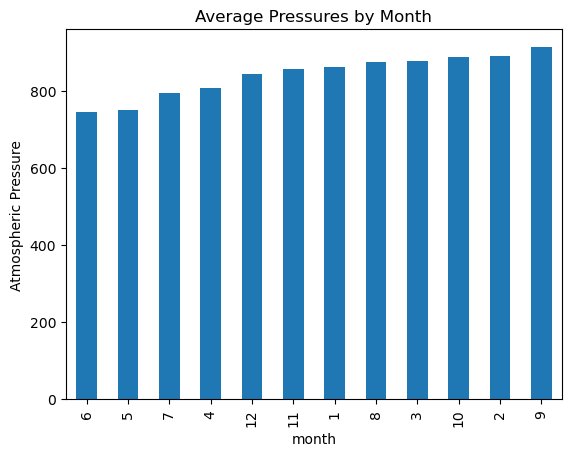

In [95]:
# sort the previous graph
avg_pressures_sorted = avg_pressures.sort_values()

# display plot
avg_pressures_sorted.plot(kind='bar', title='Average Pressures by Month', 
                          ylabel='Atmospheric Pressure')
plt.show()

#### 5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
- Answer: about 700 terrestrail days exist in a Martian year
- Logic: about 2.5 temperature cycles occur in about 1750 days so roughly one Martian year is 1750/2.5

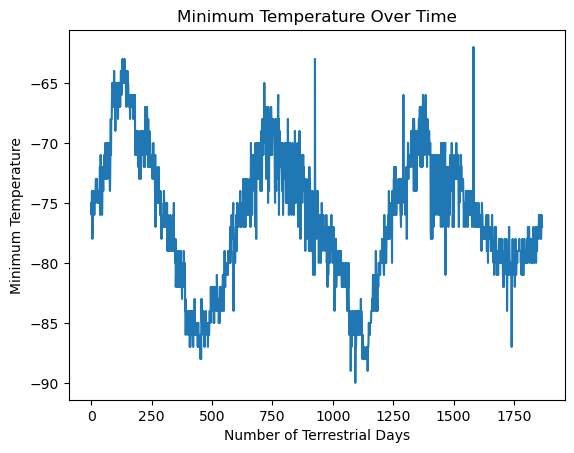

In [106]:
# visually estimate by plotting the daily minimum temperature
df['min_temp'].plot(title='Minimum Temperature Over Time', ylabel='Minimum Temperature',
                    xlabel='Number of Terrestrial Days')

plt.show()


### Save DataFrame

In [110]:
# save dataframe to csv file
df.to_csv('output/mars_weather.csv', index=False)